In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Đọc file dữ liệu
df = pd.read_csv('Gold.csv')
df.head(5)

,Open,Close,High,Low,Date
0,1302.910,1316.500,1318.910,1302.855,1/2/2018
1,1318.375,1318.875,1321.300,1307.710,1/3/2018
2,1313.105,1327.875,1327.875,1306.050,1/4/2018
3,1322.050,1319.590,1323.505,1313.910,1/5/2018
4,1321.050,1320.980,1322.210,1315.105,1/8/2018


In [3]:
df.describe()

,Open,Close,High,Low
count,2115.000000,2115.000000,2115.000000,2115.000000
mean,1674.352721,1713.599972,1706.824433,1687.010801
std,378.566989,282.643783,324.285147,326.719214
min,0.000000,1174.115000,0.000000,0.000000
25%,1458.225000,1480.200000,1478.350000,1461.925000
50%,1782.000000,1787.190000,1794.140000,1775.150000
75%,1913.670000,1914.665000,1922.450000,1902.775000
max,2427.760000,2425.490000,2449.990000,2415.020000


In [4]:
df.loc[0,:]

Open      1302.91
Close      1316.5
High      1318.91
Low      1302.855
Date     1/2/2018
Name: 0, dtype: object

In [5]:
# Đưa về kiểu date và đánh index
df['Date'] = pd.to_datetime(df.Date)

# Sắp xếp lại index
df = df.sort_index(ascending=False)
df

,Open,Close,High,Low,Date
2114,2327.820,2327.820,2327.820,2327.820,2024-06-01
2113,2343.340,2327.820,2359.580,2320.630,2024-05-31
2112,2338.880,2343.380,2351.090,2323.030,2024-05-30
2111,2361.390,2339.110,2361.790,2335.070,2024-05-29
2110,2352.200,2361.310,2363.460,2340.420,2024-05-28
...,...,...,...,...,...
4,1321.050,1320.980,1322.210,1315.105,2018-01-08
3,1322.050,1319.590,1323.505,1313.910,2018-01-05
2,1313.105,1327.875,1327.875,1306.050,2018-01-04
1,1318.375,1318.875,1321.300,1307.710,2018-01-03


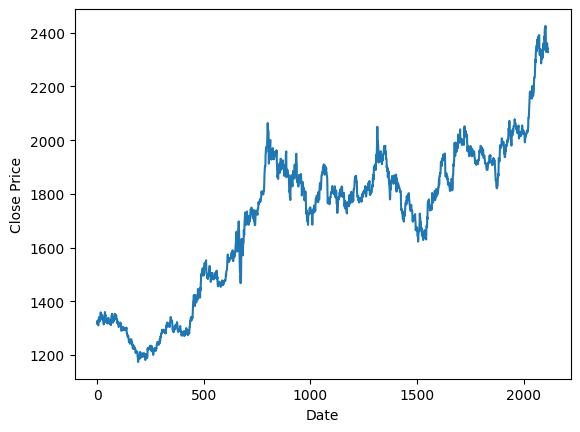

In [6]:
# Vẽ biểu đồ chuỗi thời gian
plt.plot(df.index, df["Close"])
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

In [7]:
df = df[['Close']]
df = df.reset_index(drop=True)
df.head(5)

,Close
0,2327.82
1,2327.82
2,2343.38
3,2339.11
4,2361.31


In [8]:
#Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [9]:
# Chia train test theo tỉ lệ 6:4
# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_size = int(0.6 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [10]:
train_data

array([[0.92194986],
       [0.92194986],
       [0.93438418],
       ...,
       [0.54894416],
       [0.54894416],
       [0.55504945]])

In [11]:
# Chuẩn bị dữ liệu cho x,y
def create_dataset(dataset, lags=1):
    X, Y = [], []
    for i in range(len(dataset)-lags-1):
        a = dataset[i:(i+lags), 0]
        X.append(a)
        Y.append(dataset[i + lags, 0])
    return np.array(X), np.array(Y)

In [12]:
#Thiết lập tham số cho model
lags = 30 
X_train, y_train = create_dataset(train_data, lags)
X_test, y_test = create_dataset(test_data, lags)

In [13]:
X_test

array([[0.5508221 , 0.58022975, 0.58993907, ..., 0.60276496, 0.60242933,
        0.61802817],
       [0.58022975, 0.58993907, 0.62961542, ..., 0.60242933, 0.61802817,
        0.61221856],
       [0.58993907, 0.62961542, 0.62961542, ..., 0.61802817, 0.61221856,
        0.61766856],
       ...,
       [0.11358306, 0.11358306, 0.11160923, ..., 0.10884427, 0.10978723,
        0.1173629 ],
       [0.11358306, 0.11160923, 0.11546099, ..., 0.10978723, 0.1173629 ,
        0.11625212],
       [0.11160923, 0.11546099, 0.12029567, ..., 0.1173629 , 0.11625212,
        0.12287284]])

In [14]:
#In thông tin kích thước của dữ liệu
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1238, 30) (1238,)
(815, 30) (815,)


In [15]:
#Huấn luyện model SVR
model = SVR(kernel='linear', C=10, gamma=0.01)
model.fit(X_train, y_train)

SVR(C=10, gamma=0.01, kernel='linear')

In [16]:
#Dự báo dự liệu dựa trên tập test
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred.reshape(-1,1)).flatten()

In [17]:
y_pred

array([1921.74566621, 1923.79891048, 1925.14726159, 1925.58171059,
       1927.01065543, 1927.99198008, 1927.75139657, 1927.68626786,
       1927.18231784, 1927.238861  , 1925.71676905, 1924.5690075 ,
       1927.57928086, 1930.98040471, 1933.83546789, 1936.65461171,
       1940.79502415, 1944.22219345, 1946.43869225, 1947.18199156,
       1947.95218501, 1948.5829811 , 1948.15076289, 1947.28526621,
       1947.09348091, 1946.73310262, 1946.8059496 , 1944.83070181,
       1943.77308891, 1943.11229026, 1941.1787007 , 1939.11988639,
       1935.91022579, 1932.56431808, 1926.97749434, 1921.81083417,
       1918.0906509 , 1914.26816566, 1910.70288085, 1906.8603458 ,
       1904.05248872, 1901.24036357, 1895.08057215, 1888.64873318,
       1882.32676738, 1876.19856436, 1868.66286394, 1861.46891388,
       1854.84667435, 1849.12538835, 1843.36122789, 1837.40806672,
       1831.78274675, 1826.52496064, 1820.81784786, 1815.47259016,
       1810.59297291, 1806.60446343, 1802.61470052, 1798.91948

In [18]:
# 10. Đánh giá độ chính xác thuật toán bằng MAPE, MSE và RMSE

#MAPE
test_mape = mean_absolute_percentage_error(y_pred, y_test)
#MSE
test_mse = mean_squared_error(y_pred, y_test)
#RMSE
test_rmse = np.sqrt(test_mse)

print('Testing MAPE:', test_mape)
print('Testing MSE:', test_mse)
print('Testing RMSE:', test_rmse)

Testing MAPE: 0.9998740335924021
Testing MSE: 2264752.0009066598
Testing RMSE: 1504.9092998937376


In [19]:
# 13. Dự báo 30 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
lags=30
i=0
while(i<30):
    if(len(temp_input)>30):
        x_input=np.array(temp_input[-lags:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat)  # Append the scalar value directly
        temp_input=temp_input[1:]
        lst_output.append(yhat)  # Append the scalar value directly
        i=i+1
    else:
        x_input = x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print(yhat)
        temp_input.append(yhat)
        print(len(temp_input))
        lst_output.append(yhat)
        i=i+1


0 day input [0.12029567 0.1333613  0.12896614 0.12497053 0.12619718 0.13943862
 0.13655779 0.13153132 0.12986515 0.14205174 0.14205174 0.13855559
 0.14734592 0.1333613  0.12775147 0.12584957 0.12584957 0.12033563
 0.13086405 0.13152332 0.13320148 0.12896614 0.12119469 0.10884427
 0.10978723 0.1173629  0.11625212 0.12287284 0.11568075 0.11378284]
0 day output 0.18412635708767922
1 day input [0.1333613  0.12896614 0.12497053 0.12619718 0.13943862 0.13655779
 0.13153132 0.12986515 0.14205174 0.14205174 0.13855559 0.14734592
 0.1333613  0.12775147 0.12584957 0.12584957 0.12033563 0.13086405
 0.13152332 0.13320148 0.12896614 0.12119469 0.10884427 0.10978723
 0.1173629  0.11625212 0.12287284 0.11568075 0.11378284 0.18412636]
1 day output 0.18643333747771568
2 day input [0.12896614 0.12497053 0.12619718 0.13943862 0.13655779 0.13153132
 0.12986515 0.14205174 0.14205174 0.13855559 0.14734592 0.1333613
 0.12775147 0.12584957 0.12584957 0.12033563 0.13086405 0.13152332
 0.13320148 0.12896614 0.1

In [20]:
# 13. Dự báo 60 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output_60=[]
lags=30
i=0
while(i<60):
    if(len(temp_input)>30):
        x_input=np.array(temp_input[-lags:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat)  # Append the scalar value directly
        temp_input=temp_input[1:]
        lst_output_60.append(yhat)  # Append the scalar value directly
        i=i+1
    else:
        x_input = x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print(yhat)
        temp_input.append(yhat)
        print(len(temp_input))
        lst_output_60.append(yhat)
        i=i+1


0 day input [0.12029567 0.1333613  0.12896614 0.12497053 0.12619718 0.13943862
 0.13655779 0.13153132 0.12986515 0.14205174 0.14205174 0.13855559
 0.14734592 0.1333613  0.12775147 0.12584957 0.12584957 0.12033563
 0.13086405 0.13152332 0.13320148 0.12896614 0.12119469 0.10884427
 0.10978723 0.1173629  0.11625212 0.12287284 0.11568075 0.11378284]
0 day output 0.18412635708767922
1 day input [0.1333613  0.12896614 0.12497053 0.12619718 0.13943862 0.13655779
 0.13153132 0.12986515 0.14205174 0.14205174 0.13855559 0.14734592
 0.1333613  0.12775147 0.12584957 0.12584957 0.12033563 0.13086405
 0.13152332 0.13320148 0.12896614 0.12119469 0.10884427 0.10978723
 0.1173629  0.11625212 0.12287284 0.11568075 0.11378284 0.18412636]
1 day output 0.18643333747771568
2 day input [0.12896614 0.12497053 0.12619718 0.13943862 0.13655779 0.13153132
 0.12986515 0.14205174 0.14205174 0.13855559 0.14734592 0.1333613
 0.12775147 0.12584957 0.12584957 0.12033563 0.13086405 0.13152332
 0.13320148 0.12896614 0.1

In [21]:
# 13. Dự báo 90 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output_90=[]
lags=30
i=0
while(i<90):
    if(len(temp_input)>30):
        x_input=np.array(temp_input[-lags:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat)  # Append the scalar value directly
        temp_input=temp_input[1:]
        lst_output_90.append(yhat)  # Append the scalar value directly
        i=i+1
    else:
        x_input = x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print(yhat)
        temp_input.append(yhat)
        print(len(temp_input))
        lst_output_90.append(yhat)
        i=i+1


0 day input [0.12029567 0.1333613  0.12896614 0.12497053 0.12619718 0.13943862
 0.13655779 0.13153132 0.12986515 0.14205174 0.14205174 0.13855559
 0.14734592 0.1333613  0.12775147 0.12584957 0.12584957 0.12033563
 0.13086405 0.13152332 0.13320148 0.12896614 0.12119469 0.10884427
 0.10978723 0.1173629  0.11625212 0.12287284 0.11568075 0.11378284]
0 day output 0.18412635708767922
1 day input [0.1333613  0.12896614 0.12497053 0.12619718 0.13943862 0.13655779
 0.13153132 0.12986515 0.14205174 0.14205174 0.13855559 0.14734592
 0.1333613  0.12775147 0.12584957 0.12584957 0.12033563 0.13086405
 0.13152332 0.13320148 0.12896614 0.12119469 0.10884427 0.10978723
 0.1173629  0.11625212 0.12287284 0.11568075 0.11378284 0.18412636]
1 day output 0.18643333747771568
2 day input [0.12896614 0.12497053 0.12619718 0.13943862 0.13655779 0.13153132
 0.12986515 0.14205174 0.14205174 0.13855559 0.14734592 0.1333613
 0.12775147 0.12584957 0.12584957 0.12033563 0.13086405 0.13152332
 0.13320148 0.12896614 0.1

In [22]:
# Inverse transform the future predictions
lst_output = scaler.inverse_transform(np.array(lst_output).reshape(-1, 1)).flatten()
lst_output_60 = scaler.inverse_transform(np.array(lst_output_60).reshape(-1, 1)).flatten()
lst_output_90 = scaler.inverse_transform(np.array(lst_output_90).reshape(-1, 1)).flatten()

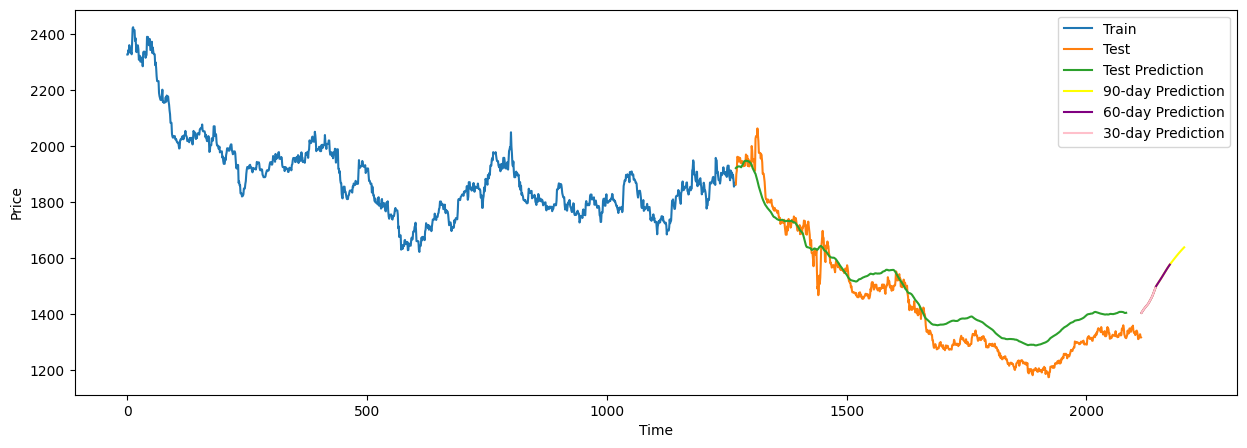

In [23]:
plt.figure(figsize=(15, 5))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, scaler.inverse_transform(train_data), label='Train')

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data), label='Test')

test_pred_index = pd.RangeIndex(start=train_size, stop=train_size+len(y_pred), step=1)
plt.plot(test_pred_index, y_pred, label='Test Prediction')

next_90days_pred_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+len(lst_output_90), step=1)
plt.plot(next_90days_pred_index, lst_output_90, color='yellow', label='90-day Prediction')

next_60days_pred_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+len(lst_output_60), step=1)
plt.plot(next_60days_pred_index, lst_output_60, color='purple', label='60-day Prediction')

next_30days_pred_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+len(lst_output), step=1)
plt.plot(next_30days_pred_index, lst_output, color='pink', label='30-day Prediction')

plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()